# Exploratory Data Analysis: Telco Churn 

In [38]:
#load library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Import Data

In [ ]:
df = pd.read_csv('Telco Churn.csv',encoding ='latin')

In [ ]:
#View Data
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Data Cleaning

There are irregularities in the TotalCharges variable caused by null value. Therefore, data need to be cleaned first.

In [ ]:
#check missing value
missing_value2 = df.sort_values(by=['TotalCharges'])
print(missing_value2)

      customerID  gender  SeniorCitizen  ... MonthlyCharges TotalCharges  Churn
936   5709-LVOEQ  Female              0  ...          80.85                  No
3826  3213-VVOLG    Male              0  ...          25.35                  No
4380  2520-SGTTA  Female              0  ...          20.00                  No
753   3115-CZMZD    Male              0  ...          20.25                  No
5218  2923-ARZLG    Male              0  ...          19.70                  No
...          ...     ...            ...  ...            ...          ...    ...
6646  8249-THVEC    Male              0  ...          19.40       997.75     No
5598  6051-PTVNS  Female              0  ...          19.15        998.1     No
3686  5899-MQZZL  Female              0  ...          75.00       999.45    Yes
3353  4536-PLEQY    Male              0  ...          85.05        999.8     No
2845  9093-FPDLG  Female              0  ...          94.20        999.9     No

[7043 rows x 21 columns]


In [ ]:
#Fillin null value with zero
df['TotalCharges'] = df['TotalCharges'].apply(lambda x:0 if x ==' ' else x)
df['TotalCharges'] = df['TotalCharges'].astype(float)
print(df.sort_values(by=['TotalCharges']))

      customerID  gender  SeniorCitizen  ... MonthlyCharges TotalCharges  Churn
3826  3213-VVOLG    Male              0  ...          25.35         0.00     No
5218  2923-ARZLG    Male              0  ...          19.70         0.00     No
4380  2520-SGTTA  Female              0  ...          20.00         0.00     No
753   3115-CZMZD    Male              0  ...          20.25         0.00     No
488   4472-LVYGI  Female              0  ...          52.55         0.00     No
...          ...     ...            ...  ...            ...          ...    ...
2187  8879-XUAHX    Male              0  ...         116.25      8564.75     No
5347  9788-HNGUT    Male              0  ...         116.95      8594.40     No
6768  9739-JLPQJ  Female              0  ...         117.50      8670.10     No
4586  7569-NMZYQ  Female              0  ...         118.75      8672.45     No
4610  2889-FPWRM    Male              0  ...         117.80      8684.80    Yes

[7043 rows x 21 columns]


#Churn Distribution

Text(0.5, 1.0, 'Churn Distribution')

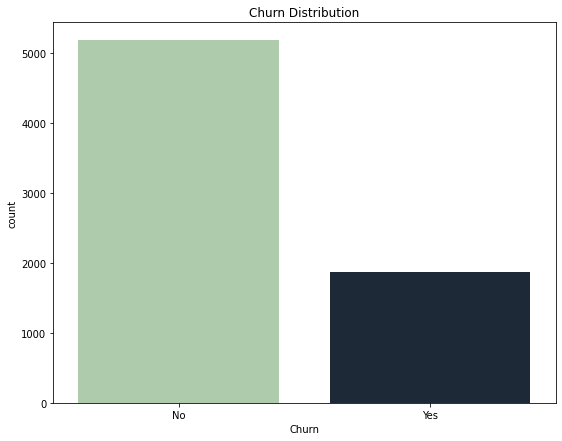

In [32]:
#Churn distribution
fig, ax = plt.subplots(figsize=(9,7))
sns.countplot(x='Churn', data=df,palette="ch:r=-.5,l=.75")
ax.set_title("Churn Distribution")

# Analysis of Churn and Numerical Variables

## Churn and Tenure

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 46.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 31.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Churn and Tenure')

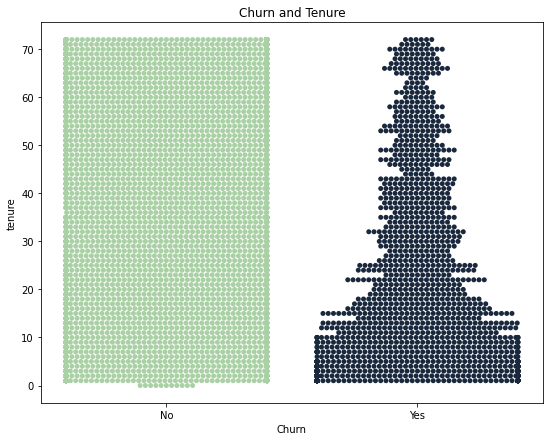

In [ ]:
#churn and tenure visualization
fig, ax = plt.subplots(figsize=(9,7))
sns.swarmplot(data=df, y='tenure', x="Churn",palette="ch:r=-.5,l=.75")
ax.set_title("Churn and Tenure")

## Churn and Total Charges

Total Charges of churn and non-churn consumer has no differences because most of them spend less than 2000.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Churn and Total Charges')

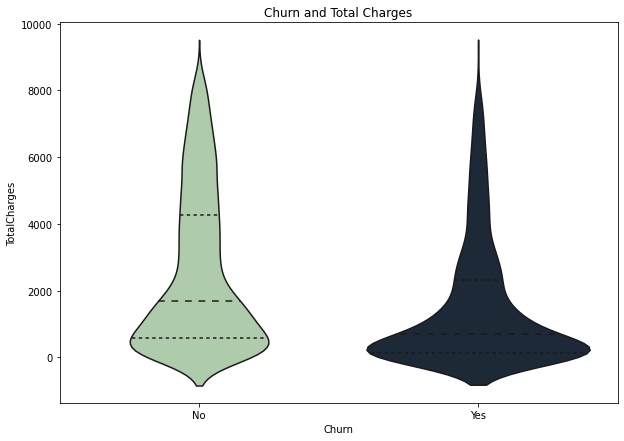

In [34]:
#churn and Total Charges visualization
fig, ax = plt.subplots(figsize=(10,7))
with sns.axes_style(style=None):
    sns.violinplot("Churn", "TotalCharges", data=df,
                   split=True, inner="quartile",
                   palette="ch:r=-.5,l=.75")
ax.set_title("Churn and Total Charges")

## Churn and Monthly Charges

Most churn consumers spend more money than non-churn consumers.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Churn and Monthly Charges')

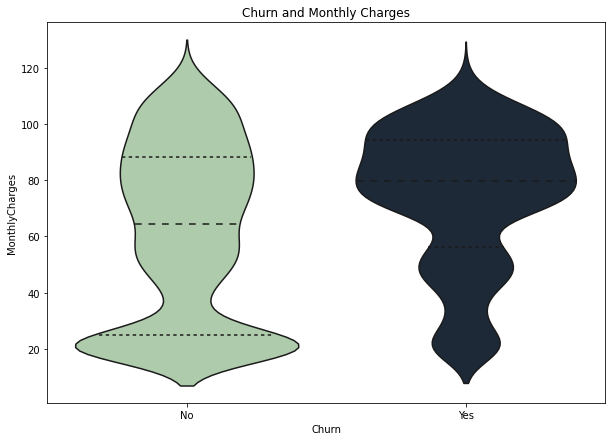

In [39]:
fig, ax = plt.subplots(figsize=(10,7))
with sns.axes_style(style=None):
    sns.violinplot("Churn", "MonthlyCharges", data=df,
                   split=True, inner="quartile",
                   palette="ch:r=-.5,l=.75")
ax.set_title("Churn and Monthly Charges")

# Service Plan Analysis

Most churns happen in low tenure users. For that reason, this section will mainly focus on data with less than 20 values for tenure.

<Figure size 648x360 with 0 Axes>

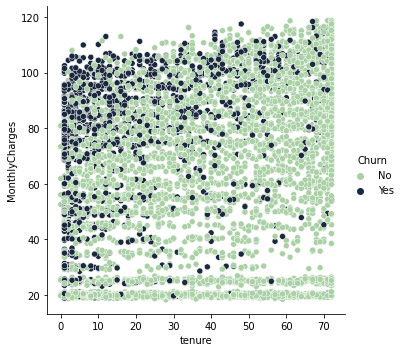

In [ ]:
#Churn by MonthlyCharges and Tenure
plt.figure(figsize=(9, 5))
sns.relplot(x='tenure',y='MonthlyCharges', data=df,hue='Churn',palette="ch:r=-.5,l=.75")

In [ ]:
#filtering user with less then 20 for tenure
df_tenure = df[(df['tenure'] < 20)]

Text(0.5, 1.0, 'Churn Distribution After Filtering')

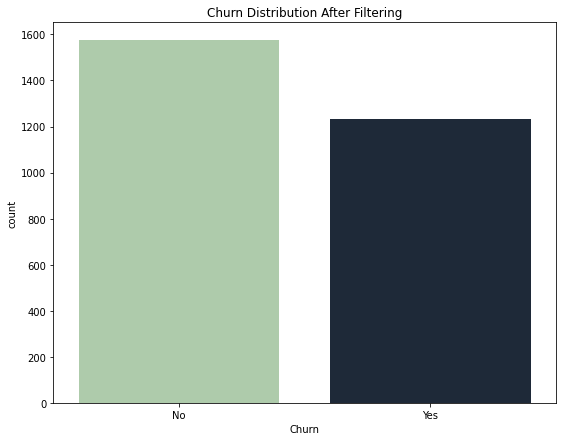

In [ ]:
#Churn distribution after filtering
fig, ax = plt.subplots(figsize=(9,7))
sns.countplot(x='Churn', data=df_tenure,palette="ch:r=-.5,l=.75")
ax.set_title("Churn Distribution After Filtering")

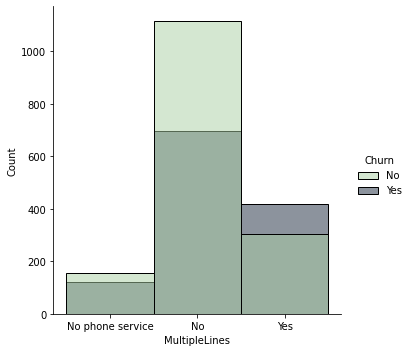

In [ ]:
#MultipleLines
sns.displot(data=df_tenure, x='MultipleLines', hue='Churn', kind='hist',palette="ch:r=-.5,l=.75")

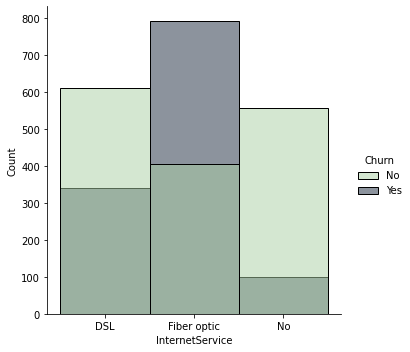

In [ ]:
#InternetService 
sns.displot(data=df_tenure, x='InternetService', hue='Churn', kind='hist',palette="ch:r=-.5,l=.75")

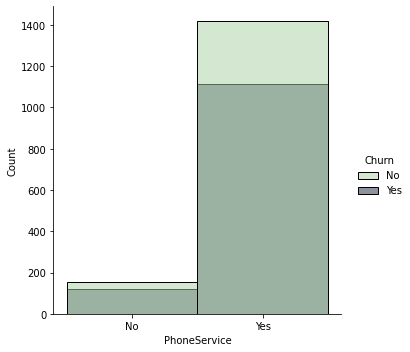

In [ ]:
#Phone service
sns.displot(data=df_tenure, x='PhoneService', hue='Churn', kind='hist',palette="ch:r=-.5,l=.75")

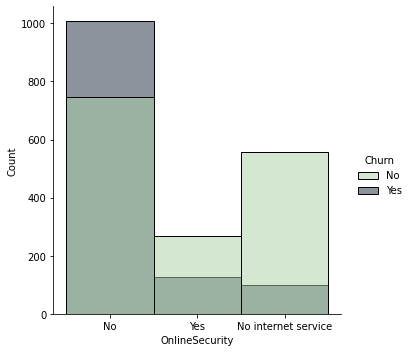

In [ ]:
#Online Security
sns.displot(data=df_tenure, x='OnlineSecurity', hue='Churn', kind='hist',palette="ch:r=-.5,l=.75")

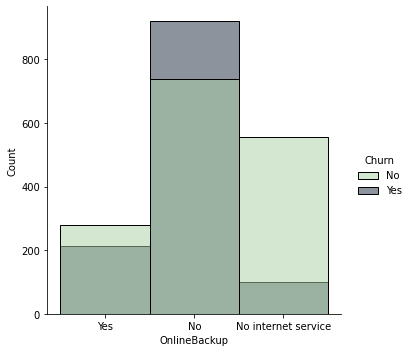

In [ ]:
#Online Backup
sns.displot(data=df_tenure, x='OnlineBackup', hue='Churn', kind='hist',palette="ch:r=-.5,l=.75")

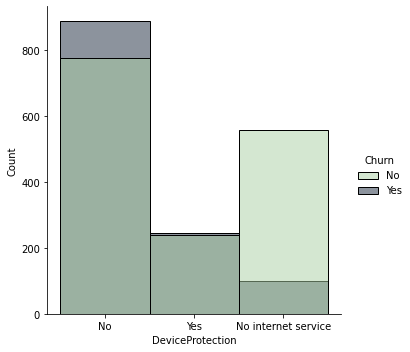

In [ ]:
#Device Protection
sns.displot(data=df_tenure, x='DeviceProtection', hue='Churn', kind='hist',palette="ch:r=-.5,l=.75")

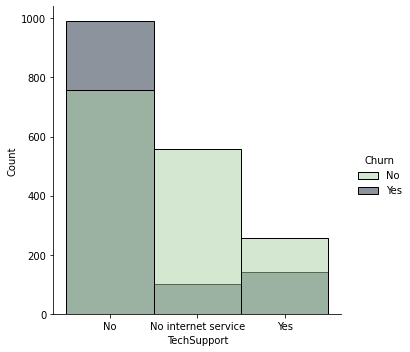

In [ ]:
#Tech Support
sns.displot(data=df_tenure, x='TechSupport', hue='Churn', kind='hist',palette="ch:r=-.5,l=.75")

# Multiple Service Plan Analysis

In [ ]:
#Filtering user who buy internet service with no additional internet service related plan
df_no_service = df_tenure[(df_tenure['InternetService'].str.contains("Fiber optic" or "DSL")) & 
                    (df_tenure['OnlineSecurity'].str.contains("No")) &
                    (df_tenure['OnlineBackup'].str.contains("No"))&
                    (df_tenure['TechSupport'].str.contains("No"))&
                    (df_tenure['DeviceProtection'].str.contains("No"))]

In [ ]:
#Filtering user who buy internet service with one additional service plan
df_one_service = df_tenure[(df_tenure['InternetService'].str.contains("Fiber optic" or "DSL")) & 
                    (df_tenure['OnlineSecurity'].str.contains("Yes"))]

In [ ]:
#Filtering user who buy internet service with two additional internet service related plan
df_tenure_two_service = df_tenure[(df_tenure['InternetService'].str.contains("Fiber optic" or "DSL")) & 
                    (df_tenure['OnlineSecurity'].str.contains("Yes")) & 
                    (df_tenure['OnlineBackup'].str.contains("Yes")) ]

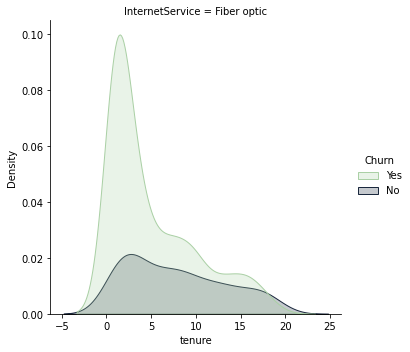

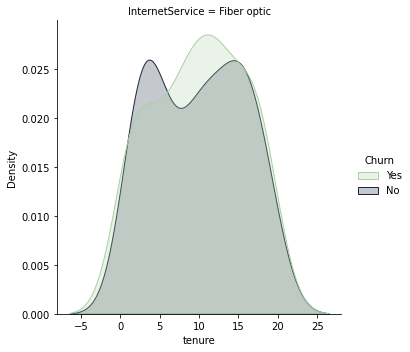

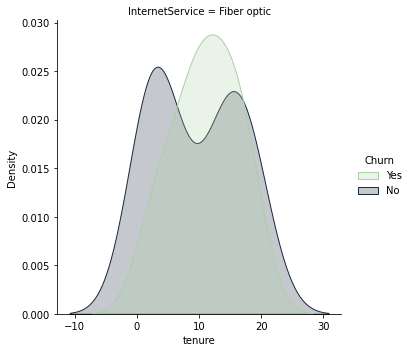

In [ ]:
#dataviz of multiple service subscription
sns.displot(data=df_no_service, x='tenure', hue='Churn', col='InternetService', kind='kde', fill=True,palette="ch:r=-.5,l=.75")
sns.displot(data=df_one_service, x='tenure', hue='Churn', col='InternetService', kind='kde', fill=True,palette="ch:r=-.5,l=.75")
sns.displot(data=df_tenure_two_service, x='tenure', hue='Churn', col='InternetService', kind='kde', fill=True,palette="ch:r=-.5,l=.75")